# Integrate and Fire Neuron (IAF)


## Introduction

In this notebook we will use a model of .... 

\begin{equation} C_{m}\frac{dV}{dt} = - g_{L}(V-E_{leak}) + I_{inj} \end{equation}

remember that $C_{m} = \tau_{m} / R_{m}$  and  $g_{L} = 1 / R_{m}$

\begin{equation} \tau_{m}\frac{dV}{dt} = - (V-E_{leak}) + I_{inj} R_{m} \end{equation}

#  Simulation

Text(0, 0.5, 'Voltage (mV)')

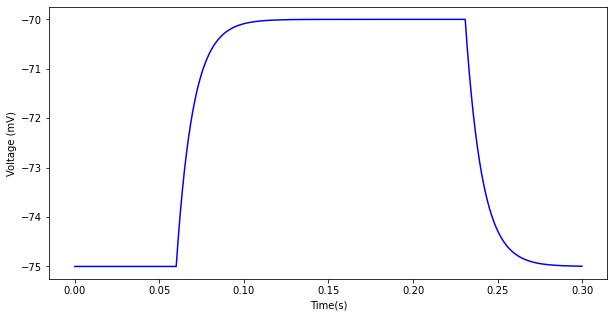

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Asign constants
V_reset = -0.080 # -80mV
E_l = -0.075 # -75mV
V_th = -0.040 # -40mV
Rm = 10e6 # membrane resistance
tau_m = 10e-3 # membrane time constant

### Initialize variables
dt = 0.0002 
T = np.arange(0,0.3,dt) # 300 ms simulation
Vm = np.zeros(T.size)
Vm[0] = E_l #this would be equal to Vm
Vm[1] = E_l
Iinj = np.zeros(T.size)
Iinj[round(T.size/5):round(T.size/1.3)] = 5e-10  
#Iinj[round(T.size/5):round(T.size/1.3)] = 5e-9  #Increase the current to 5e-9 to see some spiking action!

#Simulation 

for t in range(1,T.size-1):
    if Vm[t] > V_th :
        Vm[t] = 0
        Vm[t+1] = V_reset
    else : #Equation tau dV/dt = -(Vm - El) + Iinj Rm  
        Vm[t+1] = Vm[t] + dt * ( -(Vm[t] - E_l) + Iinj[t] * Rm) / tau_m #Check for Euler implementation to see how one solves numerically (in a simulation) a differential equation


plt.figure(figsize=(10,5))
plt.plot(T,Vm*1000,'b-')
plt.xlabel('Time(s)')
plt.ylabel('Voltage (mV)')
#plt.ylim([-80, 5])


# IAF with noise

Text(0, 0.5, 'Voltage (mV)')

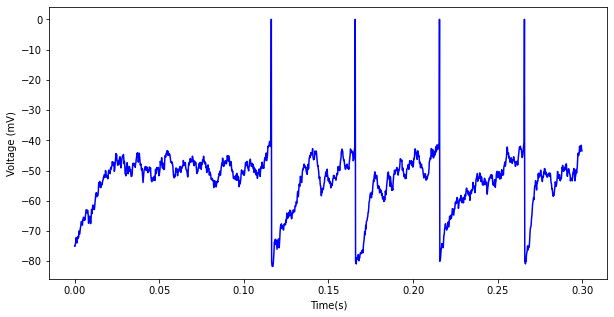

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Asign constants
V_reset = -0.080 # -80mV
E_l = -0.075 # -75mV
V_th = -0.040 # -40mV
Rm = 10e6 # membrane resistance
tau_m = 10e-3 # membrane time constant

### Initialize variables
dt = 0.0002 
T = np.arange(0,0.3,dt) # 300 ms simulation
Vm = np.zeros(T.size)
Vm[0] = E_l
Vm[1] = E_l
Iinj = 5e-9
Iinj = np.random.randn(T.size)*5e-9 + 3e-9

#Simulation 

for t in range(1,T.size-1):
    if Vm[t] > V_th :
        Vm[t] = 0
        Vm[t+1] = V_reset
    else :  #Equation tau dV/dt = (Vm - El) + Iinj Rm  
        Vm[t+1] = Vm[t] + dt * ( -(Vm[t] - E_l) + Iinj[t] * Rm) / tau_m #Check for Euler implementation to see how one solves numerically (in a simulation) a differential equation

plt.figure(figsize=(10,5))
plt.plot(T,Vm*1000,'b-')
plt.xlabel('Time(s)')
plt.ylabel('Voltage (mV)')

Now if you feel adventurous... how could you incorporate a synapse to this neuron???? 